<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-шагу-1" data-toc-modified-id="Выводы-по-шагу-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по шагу 1</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Заказчик: страховая компания.

Необходимо защитить данные клиентов заказчика, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

Для этого:
- Разработать метод преобразования данных, усложняющий восстановление персональной информации.
- Обосновать корректность его работы.

Подбирать наилучшую модель не требуется.

## Загрузка данных

In [40]:
# импорты и общие настройки проекта
import pandas as pd

#import math
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#включим отображение всех столбцов таблиц и округлим числа до тысячных
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.3f}'.format

In [41]:
# загружаем файл с данными
try:
    df = pd.read_csv('datasets/data_13/insurance.csv', sep=',') # locally hosted datafile ## , sep='\t'
except:
    df = pd.read_csv('/datasets/insurance.csv', sep=',') # Yandex-hosted datafile  ## , sep='\t'

# общий анализ структуры и состава загруженного файла
df.info()
display(df.sample(5))
display(df.describe())
print('\nПолных дубликатов:', df.duplicated().sum())
#print("\nЧисло пропусков в данных:\n", df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2615,1,35.000,"43,200.000",2,0
527,0,21.000,"47,900.000",1,0
3686,0,27.000,"32,600.000",1,0
137,1,38.000,"36,400.000",0,0
3168,1,49.000,"38,200.000",1,2


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"5,000.000","5,000.000","5,000.000","5,000.000","5,000.000"
mean,0.499,30.953,"39,916.360",1.194,0.148
std,0.500,8.441,"9,900.084",1.091,0.463
min,0.000,18.000,"5,300.000",0.000,0.000
25%,0.000,24.000,"33,300.000",0.000,0.000
50%,0.000,30.000,"40,200.000",1.000,0.000
75%,1.000,37.000,"46,600.000",2.000,0.000
max,1.000,65.000,"79,000.000",6.000,5.000



Полных дубликатов: 153


Удалим полные дубликаты строк

In [42]:
df.drop_duplicates(inplace=True)
print('\nПолных дубликатов:', df.duplicated().sum())


Полных дубликатов: 0


Преобразуем тип колонки "Возраст" в целочисленный

In [43]:
df['Возраст'] = df['Возраст'].astype("Int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                4847 non-null   int64  
 1   Возраст            4847 non-null   Int64  
 2   Зарплата           4847 non-null   float64
 3   Члены семьи        4847 non-null   int64  
 4   Страховые выплаты  4847 non-null   int64  
dtypes: Int64(1), float64(1), int64(3)
memory usage: 231.9 KB


In [44]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(16,10), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """

    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(x=data, ax=ax_box2)
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()

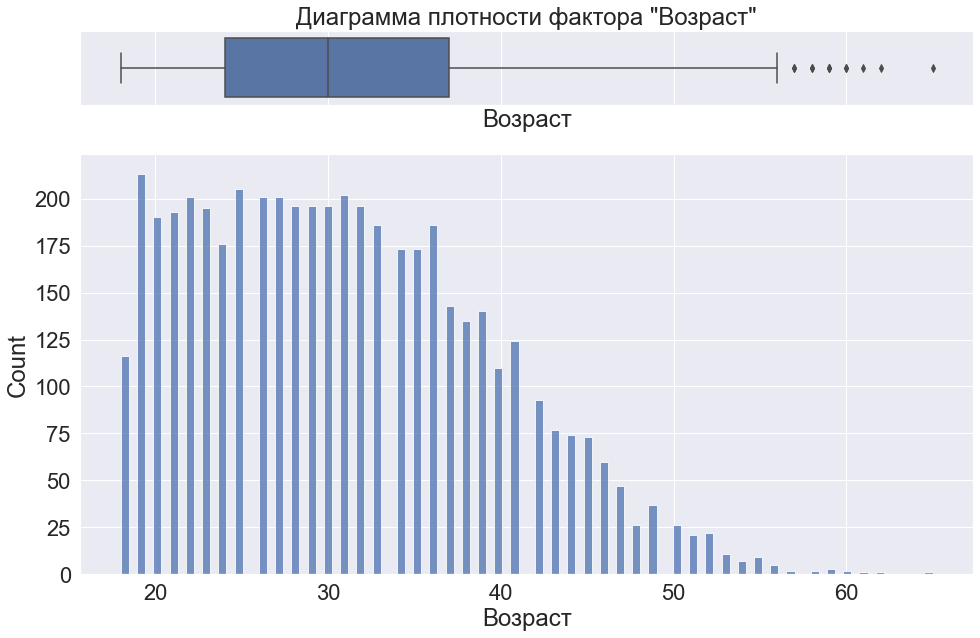

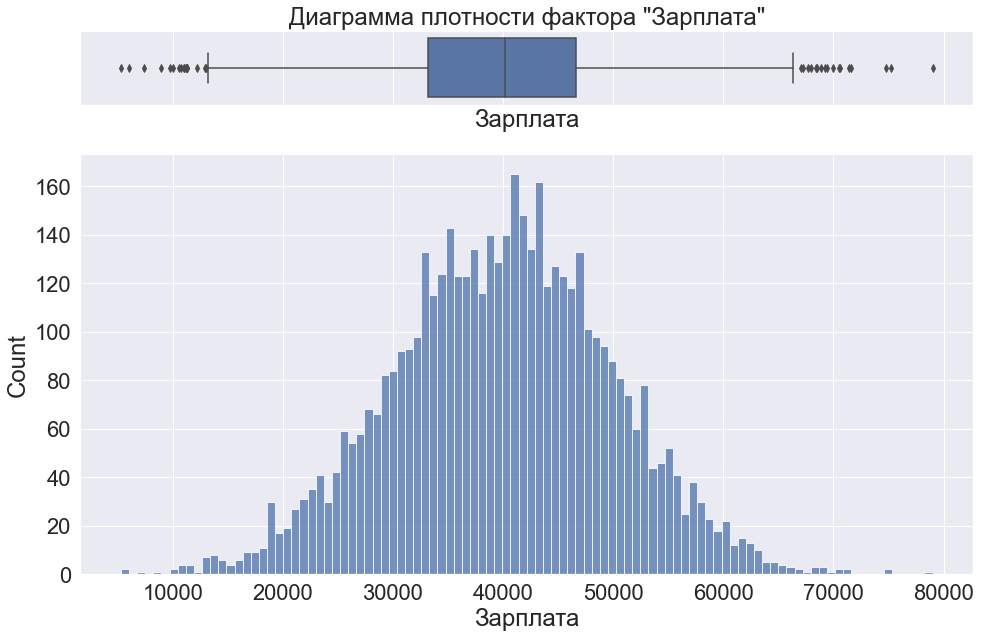

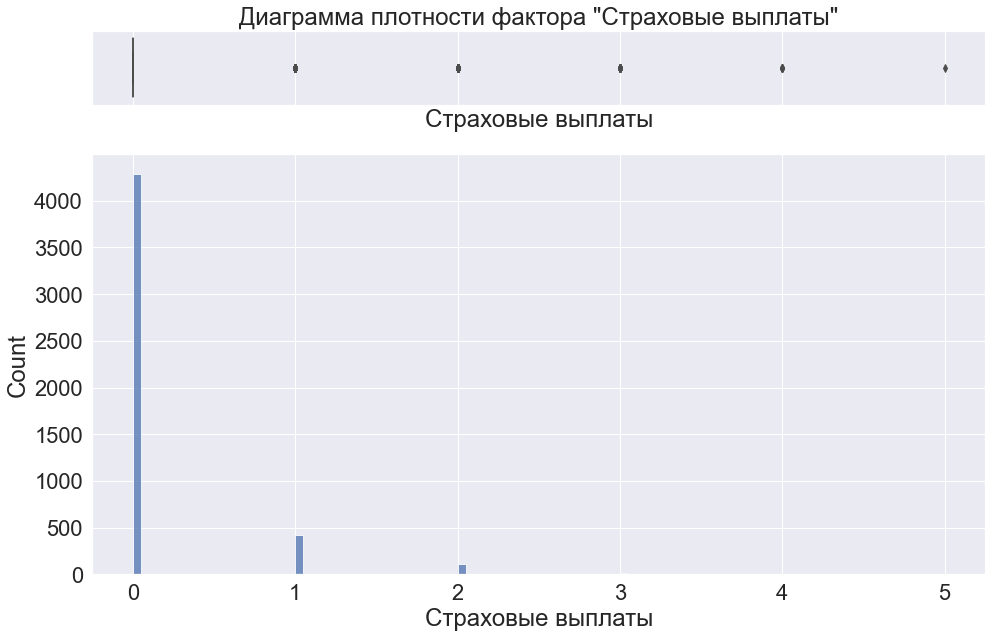

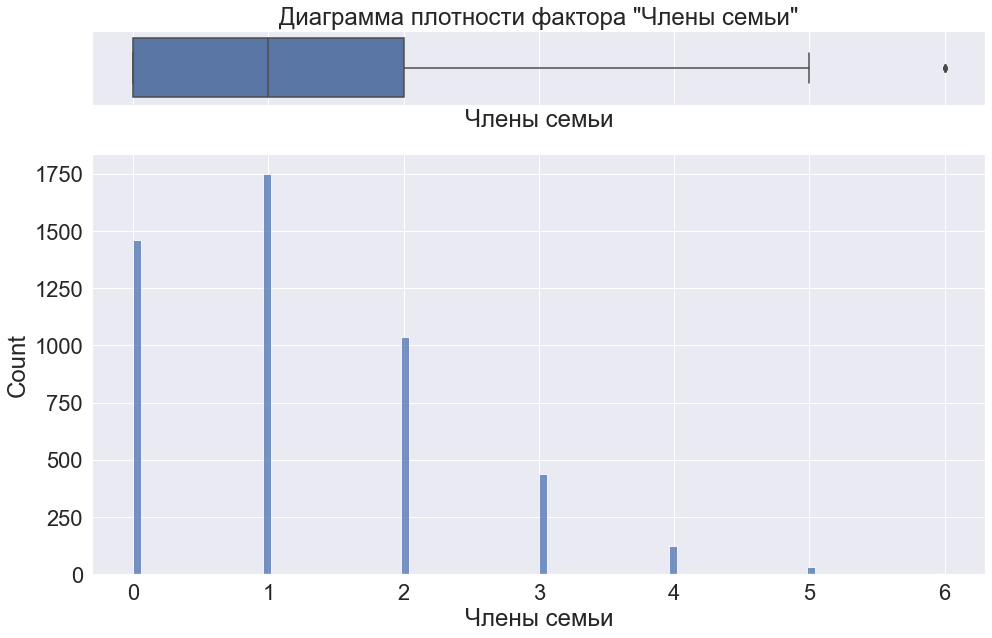

In [45]:
columns = ['Возраст', 'Зарплата', 'Страховые выплаты', 'Члены семьи']

for column in columns:
    histogram_boxplot(df[column], bins = 100, title=f'Диаграмма плотности фактора "{column}"', xlabel=column)

Проверка факторов на наличие коллинеарности

<AxesSubplot:>

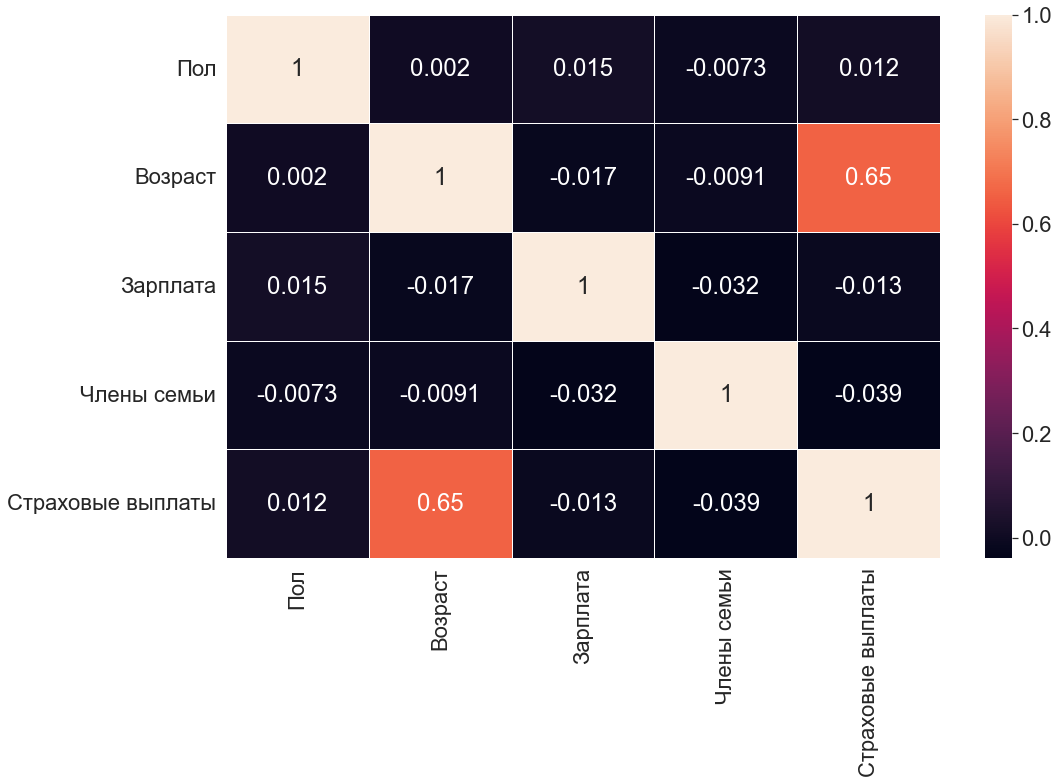

In [46]:
plt.rcParams['figure.figsize'] = (16.0, 10.0)
sns.heatmap(df.corr(), annot=True, linewidths=1, linecolor='white')

Корреляции между факторами не выявлены.
Корреляция возраста с вероятностью выплаты наводит на мысли, что речь идёт о страховании в сфере здоровья.

### Выводы по шагу 1

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Пропуски в данных не выявлены
* Удалены 153 дубликата строк (3% от выборки)
* Преобразован тип данных фактора "Возраст" в целочисленный
* Распределения факторов соответствуют их физическому смыслу, выбросы не выявлены
* Значимые корреляции между факторами не выявлены

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** изменится ли качество модели линейной регрессии при умножении её факторов на обратимую матрицу?

**Ответ:** не изменится или изменится на уровне погрешности.

**Обоснование:**

Основные свойства матриц:

$$(A B)^{-1} =B^{-1} A^{-1}$$

$$(A B)^{T} =B^{T} A^{T}$$

$$A A^{-1}=E$$

$$A E=E A=A$$

$ A(BC) = (AB)C$


Исходная формула предсказаний:

$$ a = Xw $$
    
Добавим обратимую матрицу P:

$$a' = XPw'$$

Заменим w на её формулу обучения:

$$a' = XP((XP)^T XP)^{-1}(XP)^Ty$$

Раскроем скобки с транспонированием матриц:

$$a' = XP(P^T X^T XP)^{-1}P^T X^Ty$$

Внутри формулы получаем матрицы (на примере размерности датасета из данного проекта):
* $P^T$ размером 4х4,
* $X^T$ размером 4х5000,
* $X$ размером 5000x4,
* $P$ размером 4x4.

На основании последнего свойства матриц (различная группировка матрицы внутри произведения) преобразуем формулу.
Результате преобразований соит помнить, что обратимость матриц возможна только для квадратных матриц.

Выделим множители $P^T X^T X$ и $P$, раскроем скобки:

$$a' = X P P^{-1} (P^T X^T X)^{-1} P^T X^Ty$$

Выделим множители $P^T$ и $X^T X$, раскроем скобки:

$$a' = X P P^{-1} (X^T X)^{-1}(P^T)^{-1} P^T X^Ty$$

Результатом произведений $P P^{-1}$ и $(P^T)^{-1} P^T$ будут единичные матрицы, их можно сократить.

Тогда:

$$a' = X (X^T X)^{-1} X^Ty$$

Полученная формула $(X^T X)^{-1} X^Ty$ - это как раз формула предсказаний $w$.

Тогда:

$$a' = Xw'$$

Что соответсвует исходной формуле.

Таким образом, домножение признаков на обратимую матрицу не влияет на предсказания модели с точки зрения линейной алгебры.

## Алгоритм преобразования

**Алгоритм**

1- Умножение обучающих факторов X на случайно сгенерированную обратимую квадратную матрицу P. Размерность обратимой матрицы определяется числом факторов, в текущем случае это 4х4.

2- По исходным и закодированным с помошью умножения на матрицу P данным обучается модель линейной регрессии и оценивается её качество с помощью метрики R2.

3- Метрики R2 в обоих случаях должны пренебрежимо различаться или быть равны.

**Обоснование**

Математическое обоснование приведено в предыдущем пункте.

С точки зрения реализации собственно алгоритма можно добавить, что погрешности возможны из-за ограничений типов данных, того же float64. При этом такие погречности будут пренебрежимо малы.

## Проверка алгоритма

Факторы и целевой признак при исходном состоянии данных

In [47]:
target_name = 'Страховые выплаты'

df_train = df.copy()

features = df_train.drop(target_name, axis=1)
target = df_train[target_name]
display(features.head())
print(target.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,"49,600.000",1
1,0,46,"38,000.000",1
2,0,29,"21,000.000",0
3,0,21,"41,700.000",2
4,1,28,"26,100.000",0


0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64


In [48]:
def test_model(features, target):
    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)
    r2 = r2_score(target, predictions)
    print(f'Метрика R2 для модели линейной регрессии: {r2}')

Оценка прогноза модели на исходных данных

In [49]:
test_model(features, target)

Метрика R2 для модели линейной регрессии: 0.4302010044852067


Так как необходимо "зашифровать" четыре фактора, создадим квадратную матрицу 4x4.

Также необходимо добавить проверку обратимости матрицы. Необходимым и достаточным критерием вырожденной матрицы является равенство её определителя нулю.

In [50]:
determinant = 0
p_matrix = []
while determinant == 0:
    p_matrix = np.random.normal(size=(4, 4))
    determinant = np.linalg.det(p_matrix)
display(p_matrix)

array([[ 0.62003446,  0.45824259,  1.02890487,  0.12886231],
       [-0.76279745, -0.36309922, -1.62467477, -0.52193678],
       [ 0.74289458, -0.26583254,  0.16451715, -0.21746146],
       [ 1.31440658,  0.55119178,  0.04335487, -1.88333836]])

In [51]:
features_encoded = features @ p_matrix
features_encoded.head()

,0,1,2,3
0,"36,818.231","-13,199.172","8,094.511","-10,809.243"
1,"28,196.220","-10,117.788","6,176.960","-8,289.428"
2,"15,578.665","-5,593.013","3,407.745","-4,581.827"
3,"30,965.314","-11,091.740","6,826.334","-9,082.870"
4,"19,368.810","-6,947.938","4,249.436","-5,690.230"


Оценка прогноза модели на закодированных данных

In [52]:
test_model(features_encoded, target)

Метрика R2 для модели линейной регрессии: 0.4302010044852358


Метрики качества модели R2 на исходных и закодированных данных различаются на уровне погрешности.

Таким образом, кодирование данных с помощью умножения на обратимую матрицу не снижает предсказательные возможности модели линейной регрессии и может быть использовано в работе.

### Общий вывод

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Пропуски в данных не выявлены
* Удалены 153 дубликата строк (3% от выборки)
* Преобразован тип данных фактора "Возраст" в целочисленный
* Распределения факторов соответствуют их физическому смыслу, выбросы не выявлены
* Значимые корреляции между факторами не выявлены

* С помощью аппарата линейной алгебры обоснован ответ на вопрос по умножению данных на обратимую матрицу.
* Определён алгоритм такого умножения и проверки качества моделей до и после кодирования данных:
    * Умножение обучающих факторов X на случайно сгенерированную обратимую квадратную матрицу P. Размерность обратимой матрицы определяется числом факторов, в текущем случае это 4х4.
    * По исходным и закодированным с помошью умножения на матрицу P данным обучается модель линейной регрессии и оценивается её качество с помощью метрики R2.
    * Метрики R2 в обоих случаях должны пренебрежимо различаться или быть равны.
* Алгоритм проверен на практике, теоретические оценки подтвержедны на практике.

Итоговый вывод: кодирование данных с помощью умножения на обратимую матрицу не снижает предсказательные возможности модели линейной регрессии и может быть использовано в работе.